In [4]:
import pandas as pd
import numpy as np

In [5]:
metadata = pd.read_csv('/Users/clairez/Desktop/BNFO285_Projects/Data/processed/sample_metadata_enriched.tsv', sep = "\t", header = 0)
metadata.columns

Index(['sample_id', 'patient_id', 'type',
       'age_at_initial_pathologic_diagnosis', 'gender', 'race',
       'ajcc_pathologic_tumor_stage', 'histological_type',
       'histological_grade', 'tumor_status', 'vital_status', 'OS', 'OS.time',
       'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction',
       'Source Site', 'BCR', 'sample_type', 'bcr_patient_barcode',
       'ajcc_clinical_group_stage', 'ajcc_clinical_primary_tumor_t_stage',
       'ajcc_clinical_primary_tumor_n_stage',
       'ajcc_clinical_primary_tumor_m_stage', 'tumor_stage',
       'primary_therapy_outcome_success', 'radiation_therapy',
       'postoperative_rx_tx', 'history_of_neoadjuvant_treatment',
       'hpv_status_by_ish_testing', 'hpv_status_by_p16_testing',
       'number_pack_years_smoked', 'tobacco_smoking_history_indicator',
       'alcohol_history_documented', 'frequency_of_alcohol_consumption',
       'amount_of_alcohol_consumption_per_day', 'p53_gene_analysis',
       'egfr_amplicatio

In [6]:
sig_activity = pd.read_csv("/Users/clairez/Desktop/BNFO285_Projects/project_3/Amy/Decompose_Solution_dim4/Activities/Decompose_Solution_Activities.txt", sep = "\t", header = 0)
sig_activity

,Samples,SBS1,SBS2,SBS4,SBS5,SBS13,SBS19,SBS30,SBS31,SBS87
0,TCGA-4P-AA8J,5,13,0,104,22,0,0,0,0
1,TCGA-BA-4074,22,0,0,80,0,0,0,52,0
2,TCGA-BA-4075,8,0,0,98,0,0,0,0,16
3,TCGA-BA-4076,17,0,230,154,0,0,0,0,0
4,TCGA-BA-4077,14,91,0,127,92,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
489,TCGA-UF-A7JT,31,35,0,53,49,0,51,0,0
490,TCGA-UF-A7JV,5,22,0,27,17,0,16,0,0
491,TCGA-UP-A6WW,6,0,0,13,0,14,0,0,12
492,TCGA-WA-A7GZ,28,33,0,133,35,0,0,0,0


In [7]:
smokers = metadata[metadata['tobacco_smoking_history_indicator'] == 'Current smoker']["patient_id"]
smokers = pd.Index(smokers).intersection(sig_activity["Samples"]).tolist()
ex_smokers = metadata[metadata['tobacco_smoking_history_indicator'].str.contains('reformed smoker', case=False, na=False)]["patient_id"]
ex_smokers = pd.Index(ex_smokers).intersection(sig_activity["Samples"]).tolist()
non_smokers = metadata[metadata['tobacco_smoking_history_indicator'] == 'Lifelong Non-smoker']["patient_id"]
non_smokers = pd.Index(non_smokers).intersection(sig_activity["Samples"]).tolist()

In [8]:
from scipy import stats

smoker_mut_burden = sig_activity[sig_activity["Samples"].isin(smokers)].drop(columns="Samples").sum(axis=1)
ex_smoker_mut_burden = sig_activity[sig_activity["Samples"].isin(ex_smokers)].drop(columns="Samples").sum(axis=1)
non_smoker_mut_burden = sig_activity[sig_activity["Samples"].isin(non_smokers)].drop(columns="Samples").sum(axis=1)

h_stat, p_val = stats.kruskal(smoker_mut_burden, ex_smoker_mut_burden, non_smoker_mut_burden)
p_val

np.float64(4.476413312095623e-05)

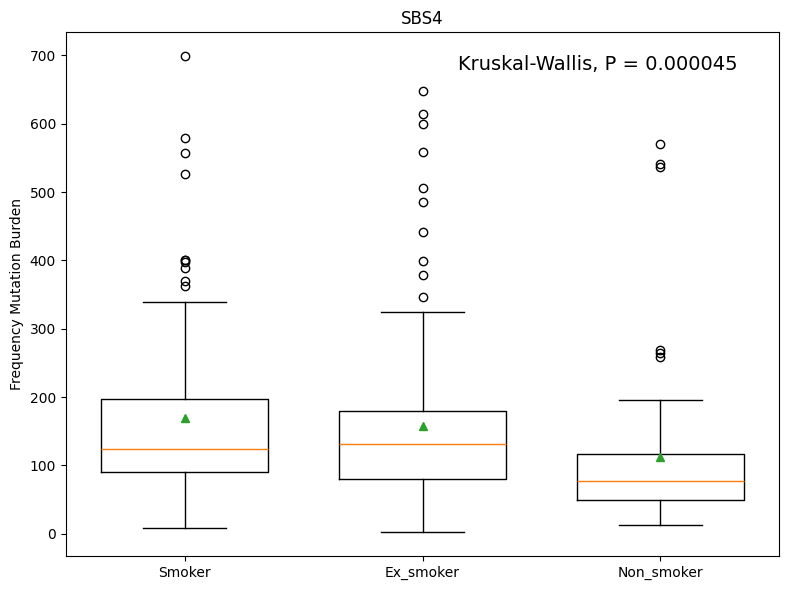

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Smoker', 'Ex_smoker', 'Non_smoker']

fig, ax = plt.subplots(figsize=(8, 6))
parts = ax.boxplot(
    [smoker_mut_burden, ex_smoker_mut_burden, non_smoker_mut_burden],
    showmeans=True,
    widths=0.7
)

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(labels)

ax.text(0.55, 0.92, f"Kruskal-Wallis, P = {p_val:.6f}",
        transform=ax.transAxes,
        fontsize=14,
        verticalalignment='bottom',
        horizontalalignment='left')

ax.set_ylabel('Frequency Mutation Burden')
ax.set_title('SBS4')
plt.tight_layout()
plt.show()

In [10]:
processed_metadata = pd.read_csv('/Users/clairez/Desktop/BNFO285_Projects/Data/processed/processed_metadata.txt', sep = "\t", header = 0)
processed_metadata

,patient_id,age,OS,OS_time,DSS,DSS_time,DFI,DFI_time,gender,tumor_site,tumor_class,tumor_stage,hpv_status
0,TCGA-4P-AA8J,66.0,0.0,102.0,0.0,102.0,NaN,NaN,MALE,tongue,primary,Stage IVA,negative
1,TCGA-BA-4074,69.0,1.0,462.0,1.0,462.0,NaN,NaN,MALE,tongue,primary,Stage IVA,NaN
2,TCGA-BA-4075,49.0,1.0,283.0,1.0,283.0,NaN,NaN,MALE,tongue,primary,Stage III,NaN
3,TCGA-BA-4076,39.0,1.0,415.0,1.0,415.0,NaN,NaN,MALE,Larynx,primary,NaN,NaN
4,TCGA-BA-4077,45.0,1.0,1134.0,1.0,1134.0,NaN,NaN,FEMALE,tongue,primary,Stage IVA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,TCGA-UF-A7JT,72.0,1.0,993.0,1.0,993.0,NaN,NaN,FEMALE,mouth,metastasis,NaN,NaN
496,TCGA-UF-A7JV,62.0,1.0,90.0,1.0,90.0,NaN,NaN,FEMALE,Hypopharynx,recurrence,NaN,NaN
497,TCGA-UP-A6WW,58.0,0.0,518.0,0.0,518.0,NaN,NaN,MALE,tongue,primary,NaN,NaN
498,TCGA-WA-A7GZ,58.0,1.0,625.0,0.0,625.0,0.0,625.0,MALE,mouth,primary,NaN,NaN


In [11]:
has_sbs4 = sig_activity[sig_activity["SBS4"] > 0]["Samples"].tolist()
km_df = processed_metadata
km_df["has_sbs4"] = km_df["patient_id"].isin(has_sbs4)

   test_statistic         p  -log2(p)
0        2.132858  0.144172   2.79414


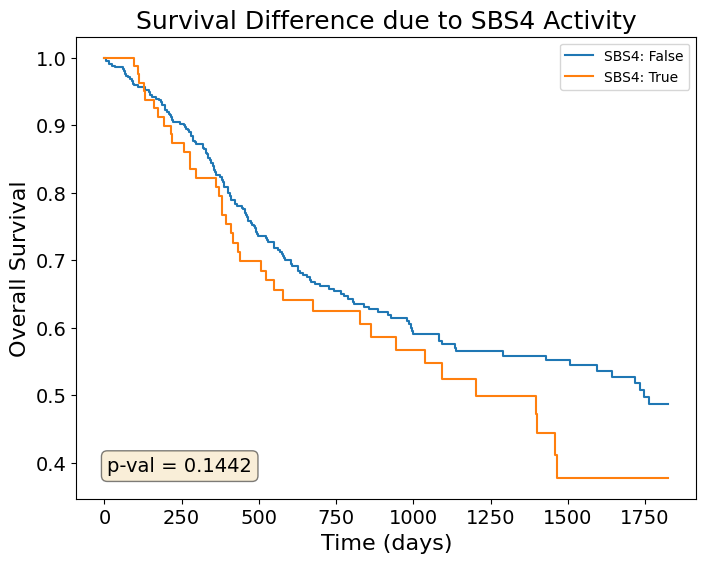

In [12]:
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import multivariate_logrank_test

kmf = KaplanMeierFitter()
plt.figure(figsize=(8, 6))

cutoff_days = 5 * 365
timeline = np.linspace(0, cutoff_days, 500)

for status, cluster_df in km_df.groupby('has_sbs4'):
    kmf.fit(cluster_df['OS_time'], timeline=timeline, event_observed=cluster_df['OS'], label=f'SBS4: {status}')
    kmf.plot_survival_function(ci_show=False)

logrank_results = multivariate_logrank_test(km_df['OS_time'], km_df['has_sbs4'], event_observed=km_df['OS'])

print(logrank_results.summary)

plt.title("Survival Difference due to SBS4 Activity", fontsize=18)
plt.xlabel("Time (days)", fontsize=16)
plt.ylabel("Overall Survival", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=10, frameon=True)

ax = plt.gca()
ax.text(0.05, 0.05, f"p-val = {logrank_results.p_value:.4f}",
        transform=ax.transAxes,
        fontsize=14,
        verticalalignment='bottom',
        horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()

In [13]:
sbs1_activity = sig_activity["SBS1"]
sbs5_activity = sig_activity["SBS5"]

age_at_diagnosis = processed_metadata[processed_metadata["patient_id"].isin(sig_activity["Samples"])]["age"]

/var/folders/_k/b8vsv8097ss3sxnsdwkx1y_80000gn/T/ipykernel_64552/1938650161.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


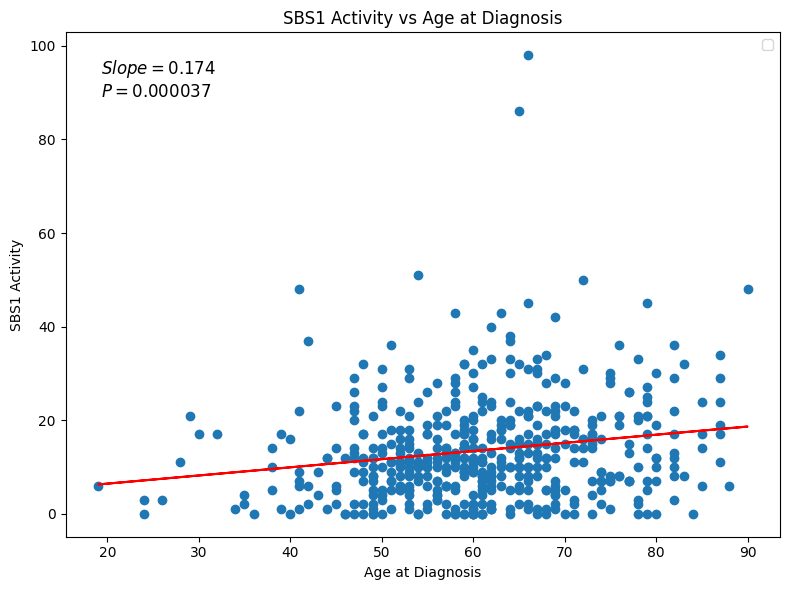

In [14]:
from scipy.stats import linregress

x = age_at_diagnosis
y = sbs1_activity

# Fit linear regression
slope, intercept = np.polyfit(x, y, 1)
y_pred = slope * x + intercept

p_val = linregress(x, y).pvalue

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y)
ax.plot(x, y_pred, color='red')
ax.set_xlabel('Age at Diagnosis')
ax.set_ylabel('SBS1 Activity')
ax.set_title('SBS1 Activity vs Age at Diagnosis')
ax.text(0.05, 0.95, f'$Slope = {slope:.3f}$', transform=ax.transAxes,
        fontsize=12, verticalalignment='top')
ax.text(0.05, 0.9, f'$P = {p_val:.6f}$', transform=ax.transAxes,
        fontsize=12, verticalalignment='top')
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/_k/b8vsv8097ss3sxnsdwkx1y_80000gn/T/ipykernel_64552/869661907.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


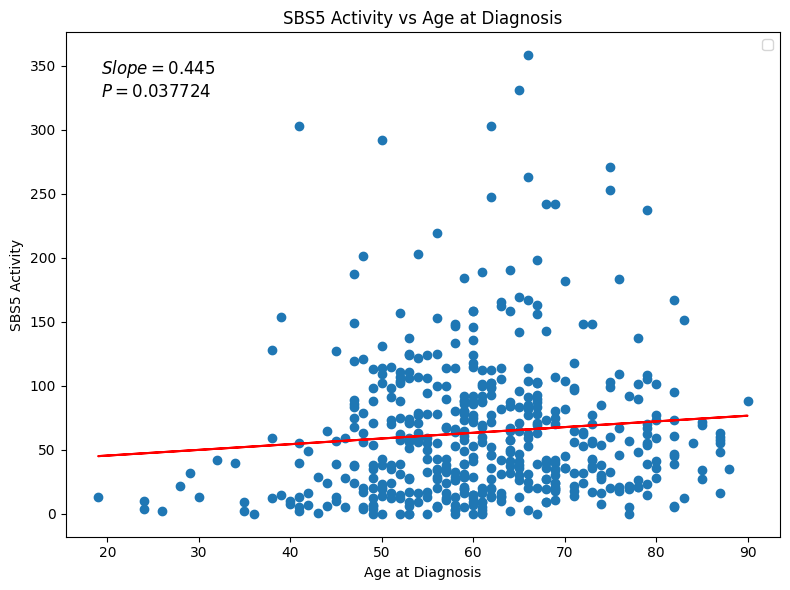

In [15]:
x = age_at_diagnosis
y = sbs5_activity

# Fit linear regression
slope, intercept = np.polyfit(x, y, 1)
y_pred = slope * x + intercept

p_val = linregress(x, y).pvalue

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y)
ax.plot(x, y_pred, color='red')
ax.set_xlabel('Age at Diagnosis')
ax.set_ylabel('SBS5 Activity')
ax.set_title('SBS5 Activity vs Age at Diagnosis')
ax.text(0.05, 0.95, f'$Slope = {slope:.3f}$', transform=ax.transAxes,
        fontsize=12, verticalalignment='top')
ax.text(0.05, 0.9, f'$P = {p_val:.6f}$', transform=ax.transAxes,
        fontsize=12, verticalalignment='top')
ax.legend()
plt.tight_layout()
plt.show()

In [16]:
hpv_pos = processed_metadata[processed_metadata["hpv_status"] == "positive"]["patient_id"].tolist()
hpv_neg = processed_metadata[processed_metadata["hpv_status"] == "negative"]["patient_id"].tolist()

hpv_pos_sbs2 = sig_activity[sig_activity["Samples"].isin(hpv_pos)]["SBS2"]
hpv_neg_sbs2 = sig_activity[sig_activity["Samples"].isin(hpv_neg)]["SBS2"]

In [17]:
from scipy.stats import mannwhitneyu
h_stat, p_val = stats.mannwhitneyu(hpv_pos_sbs2, hpv_neg_sbs2, alternative="greater")
p_val

np.float64(0.39582712775175294)

In [18]:
hpv_pos_sbs13 = sig_activity[sig_activity["Samples"].isin(hpv_pos)]["SBS13"]
hpv_neg_sbs13 = sig_activity[sig_activity["Samples"].isin(hpv_neg)]["SBS13"]

h_stat, p_val = stats.mannwhitneyu(hpv_pos_sbs13, hpv_neg_sbs13, alternative="greater")
p_val

np.float64(0.8100656279231714)

In [23]:
sbs2_act = sig_activity[sig_activity["SBS2"] > 0]["Samples"].tolist()
sbs13_act = sig_activity[sig_activity["SBS13"] > 0]["Samples"].tolist()
perc_has_status = len(processed_metadata[processed_metadata['hpv_status'] == 'positive']['hpv_status']) / len(set(sbs2_act+sbs13_act))
print(f"Percentage of SBS2/13-active patients with known HPV status: {perc_has_status:.2%}")

Percentage of SBS2/13-active patients with known HPV status: 17.12%
